In [4]:
# Importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
import requests
from config import gkey

accident_data_to_load = "../Resources/Accidents0515.csv"
vehicle_data_to_load = "../Resources/Vehicles0515.csv"
casualty_data_to_load = "../Resources/Casualties0515.csv"


In [60]:
# Loading accident, vehicle, and casualty data (next 3 cells)
accident_data = pd.read_csv(accident_data_to_load)

In [61]:
vehicle_data = pd.read_csv(vehicle_data_to_load, error_bad_lines=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [62]:
casualty_data = pd.read_csv(casualty_data_to_load, error_bad_lines=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [63]:
accident_data.shape

(1780653, 32)

* Our accident data has 1,780,653 rows and 32 columns.

In [64]:
vehicle_data.shape

(3004425, 22)

* Our Vehicle data has 3,004,425 rows and 22 columns.

In [65]:
casualty_data.shape

(2216720, 15)

* Our casualty data has 2,216,720 rows and 15 columns. 

In [66]:
accident_data.count()

Accident_Index                                 1780653
Location_Easting_OSGR                          1780515
Location_Northing_OSGR                         1780515
Longitude                                      1780515
Latitude                                       1780515
Police_Force                                   1780653
Accident_Severity                              1780653
Number_of_Vehicles                             1780653
Number_of_Casualties                           1780653
Date                                           1780653
Day_of_Week                                    1780653
Time                                           1780502
Local_Authority_(District)                     1780653
Local_Authority_(Highway)                      1780653
1st_Road_Class                                 1780653
1st_Road_Number                                1780653
Road_Type                                      1780653
Speed_limit                                    1780653
Junction_D

* Our accident data is missing values, we need to clean it in order to continue. 

In [67]:
clean_accident_df = accident_data.dropna(how="any")
clean_accident_df.count()

Accident_Index                                 1651142
Location_Easting_OSGR                          1651142
Location_Northing_OSGR                         1651142
Longitude                                      1651142
Latitude                                       1651142
Police_Force                                   1651142
Accident_Severity                              1651142
Number_of_Vehicles                             1651142
Number_of_Casualties                           1651142
Date                                           1651142
Day_of_Week                                    1651142
Time                                           1651142
Local_Authority_(District)                     1651142
Local_Authority_(Highway)                      1651142
1st_Road_Class                                 1651142
1st_Road_Number                                1651142
Road_Type                                      1651142
Speed_limit                                    1651142
Junction_D

*  We have cleaned the accident data by dropping empty values.

In [68]:
clean_accident_df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

* The data types in our accident data are sufficent for our use. 

In [69]:
vehicle_data.count()

Accident_Index                      3004425
Vehicle_Reference                   3004425
Vehicle_Type                        3004425
Towing_and_Articulation             3004425
Vehicle_Manoeuvre                   3004425
Vehicle_Location-Restricted_Lane    3004425
Junction_Location                   3004425
Skidding_and_Overturning            3004425
Hit_Object_in_Carriageway           3004425
Vehicle_Leaving_Carriageway         3004425
Hit_Object_off_Carriageway          3004425
1st_Point_of_Impact                 3004425
Was_Vehicle_Left_Hand_Drive?        3004425
Journey_Purpose_of_Driver           3004425
Sex_of_Driver                       3004425
Age_of_Driver                       3004425
Age_Band_of_Driver                  3004425
Engine_Capacity_(CC)                3004425
Propulsion_Code                     3004425
Age_of_Vehicle                      3004425
Driver_IMD_Decile                   3004425
Driver_Home_Area_Type               3004425
dtype: int64

* There are no missing values in our vehicle data. 

In [70]:
vehicle_data.dtypes

Accident_Index                      object
Vehicle_Reference                    int64
Vehicle_Type                         int64
Towing_and_Articulation              int64
Vehicle_Manoeuvre                    int64
Vehicle_Location-Restricted_Lane     int64
Junction_Location                    int64
Skidding_and_Overturning             int64
Hit_Object_in_Carriageway            int64
Vehicle_Leaving_Carriageway          int64
Hit_Object_off_Carriageway           int64
1st_Point_of_Impact                  int64
Was_Vehicle_Left_Hand_Drive?         int64
Journey_Purpose_of_Driver            int64
Sex_of_Driver                        int64
Age_of_Driver                        int64
Age_Band_of_Driver                   int64
Engine_Capacity_(CC)                 int64
Propulsion_Code                      int64
Age_of_Vehicle                       int64
Driver_IMD_Decile                    int64
Driver_Home_Area_Type                int64
dtype: object

* The data types in our vehicle data are sufficent for our use. 

In [71]:
casualty_data.count()

Accident_Index                        2216720
Vehicle_Reference                     2216720
Casualty_Reference                    2216720
Casualty_Class                        2216720
Sex_of_Casualty                       2216720
Age_of_Casualty                       2216720
Age_Band_of_Casualty                  2216720
Casualty_Severity                     2216720
Pedestrian_Location                   2216720
Pedestrian_Movement                   2216720
Car_Passenger                         2216720
Bus_or_Coach_Passenger                2216720
Pedestrian_Road_Maintenance_Worker    2216720
Casualty_Type                         2216720
Casualty_Home_Area_Type               2216720
dtype: int64

* There are no missing values in our casualty data.

In [72]:
casualty_data.dtypes

Accident_Index                        object
Vehicle_Reference                      int64
Casualty_Reference                     int64
Casualty_Class                         int64
Sex_of_Casualty                        int64
Age_of_Casualty                        int64
Age_Band_of_Casualty                   int64
Casualty_Severity                      int64
Pedestrian_Location                    int64
Pedestrian_Movement                    int64
Car_Passenger                          int64
Bus_or_Coach_Passenger                 int64
Pedestrian_Road_Maintenance_Worker     int64
Casualty_Type                          int64
Casualty_Home_Area_Type                int64
dtype: object

* The data types in our casualty data are sufficent for our use. 

In [73]:
organized_accidents = clean_accident_df[["Accident_Index", "Longitude", "Latitude", "Accident_Severity", "Number_of_Vehicles", "Number_of_Casualties","Date", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Special_Conditions_at_Site", "Local_Authority_(Highway)"]]
organized_accidents.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Local_Authority_(Highway)
0,200501BS00001,-0.191170,51.489096,2,1,1,04/01/2005,1,2,2,0,E09000020
1,200501BS00002,-0.211708,51.520075,3,1,1,05/01/2005,4,1,1,0,E09000020
2,200501BS00003,-0.206458,51.525301,3,2,1,06/01/2005,4,1,1,0,E09000020
3,200501BS00004,-0.173862,51.482442,3,1,1,07/01/2005,1,1,1,0,E09000020
4,200501BS00005,-0.156618,51.495752,3,1,1,10/01/2005,7,1,2,0,E09000020


* We do not need all 32 columns in our accident data, so we have organized the data frame above and only included the columns we need.

In [74]:
organized_vehicles = vehicle_data[["Accident_Index","Vehicle_Reference", "Vehicle_Type", "Vehicle_Manoeuvre", "Junction_Location", "Journey_Purpose_of_Driver", "Sex_of_Driver", "Age_of_Driver", "Engine_Capacity_(CC)"]]
organized_vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Vehicle_Manoeuvre,Junction_Location,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC)
0,200501BS00001,1,9,18,0,15,2,74,-1
1,200501BS00002,1,11,4,3,1,1,42,8268
2,200501BS00003,1,11,17,0,1,1,35,8300
3,200501BS00003,2,9,2,0,15,1,62,1762
4,200501BS00004,1,9,18,0,15,2,49,1769


* We do not need all 22 columns in our vehicle data, so we have organized the data frame above and only have included the columns we need.

In [75]:
organized_casualty = casualty_data[["Accident_Index", "Vehicle_Reference", "Casualty_Reference", "Casualty_Class", "Sex_of_Casualty", "Age_of_Casualty", "Casualty_Severity", "Casualty_Type"]]
organized_casualty.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Casualty_Type
0,200501BS00001,1,1,3,1,37,2,0
1,200501BS00002,1,1,2,1,37,3,11
2,200501BS00003,2,1,1,1,62,3,9
3,200501BS00004,1,1,3,1,30,3,0
4,200501BS00005,1,1,1,1,49,3,3


* We do not need all 15 columns in our casualty data, so we have organized the data frame above and only inlcuded the columns we need.

In [76]:
complete_accidents = pd.merge(organized_accidents, organized_vehicles, on=["Accident_Index", "Accident_Index"])
complete_accident_data = pd.merge(complete_accidents, organized_casualty, on=["Accident_Index", "Accident_Index"])

complete_accident_data.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,...,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Casualty_Type
0,200501BS00001,-0.191170,51.489096,2,1,1,04/01/2005,1,2,2,...,2,74,-1,1,1,3,1,37,2,0
1,200501BS00002,-0.211708,51.520075,3,1,1,05/01/2005,4,1,1,...,1,42,8268,1,1,2,1,37,3,11
2,200501BS00003,-0.206458,51.525301,3,2,1,06/01/2005,4,1,1,...,1,35,8300,2,1,1,1,62,3,9
3,200501BS00003,-0.206458,51.525301,3,2,1,06/01/2005,4,1,1,...,1,62,1762,2,1,1,1,62,3,9
4,200501BS00004,-0.173862,51.482442,3,1,1,07/01/2005,1,1,1,...,2,49,1769,1,1,3,1,30,3,0


* Our cleaned and merged dataframe has 4,004,836 rows and 27 columns. 

In [77]:
# number of accidents 
numAccidents = len(clean_accident_df)
# Number of vehicles involved in accidents 
numCars = len(vehicle_data)
# Number of deaths 
#numDead = casualties_per_yr["Accidents"].sum()
# Number of male and female drivers involved in accidents
numMaleDriver = len(vehicle_data[vehicle_data["Sex_of_Driver"] == 1])
numFemaleDriver = len(vehicle_data[vehicle_data["Sex_of_Driver"] == 2])
# Number of male and female driver deaths 
numMaleDead = len(casualty_data[casualty_data["Sex_of_Casualty"] == 1])
numFemaleDead = len(casualty_data[casualty_data["Sex_of_Casualty"] == 2])
# Print Results 
print(f"Total number of accidents is: {numAccidents}")
print(f"Total number of cars involved in accidents: {numCars}")
#print(f"Total number of casualties: {numDead}")
print(f"Total number of male drivers: {numMaleDriver}")
print(f"Total number of female drivers: {numFemaleDriver}")
print(f"Total number of male casualties: {numMaleDead}")
print(f"Total number of female casualties: {numFemaleDead}")

Total number of accidents is: 1651142
Total number of cars involved in accidents: 3004425
Total number of male drivers: 1978150
Total number of female drivers: 852519
Total number of male casualties: 1292262
Total number of female casualties: 923828


* This is some general data about our accident dataframe. 

In [78]:
# accidents per year
accidents_per_yr = clean_accident_df.loc[:,'Date'].groupby(clean_accident_df['Date'].map(lambda x: x[6:10])).count()
accidents_per_yr = accidents_per_yr.to_frame()
accidents_per_yr['Year'] = accidents_per_yr.index
accidents_per_yr.columns = ['Accidents','Year']
accidents_per_yr
accidents_per_yr["Accidents"].sum()
accidents_per_yr

,Accidents,Year
Date,,
2005,185170,2005
2006,176124,2006
2007,161185,2007
2008,158255,2008
2009,151825,2009
2010,144107,2010
2011,141497,2011
2012,135894,2012
2013,128896,2013


* Above, we are extracting the year from the "year" column and counting accidents per year. 

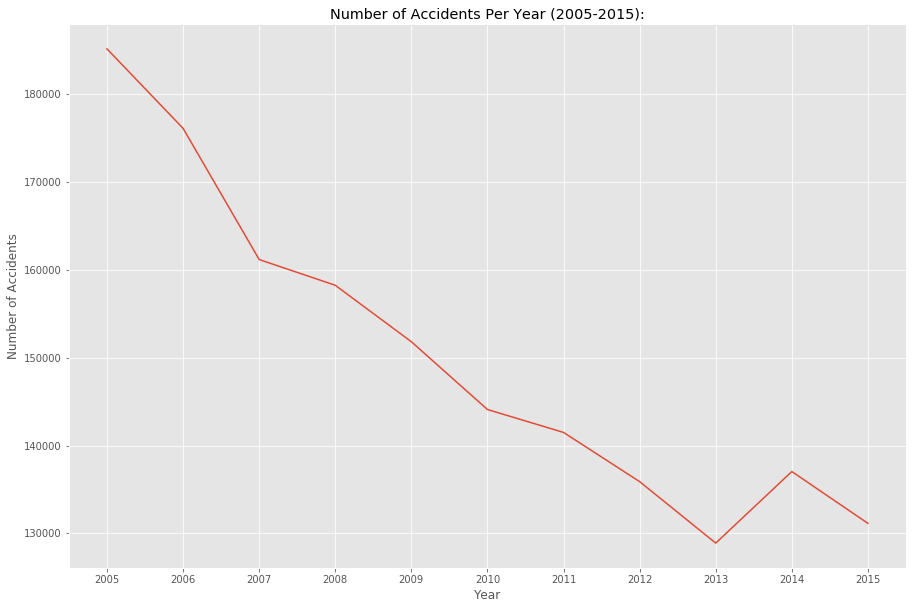

In [141]:
plt.figure(figsize=(15,10))
plt.plot(accidents_per_yr['Year'], accidents_per_yr["Accidents"], label = 'Year')
plt.title('Number of Accidents Per Year (2005-2015):')
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.style.use("ggplot")
plt.show
plt.savefig('Accident_per_year.png')

* The graph above displays number of accidents per year. 

<Figure size 432x288 with 0 Axes>

In [81]:
context_accident_severity = pd.read_csv("contextCSVs/Accident_Severity.csv")

In [82]:
context_accident_severity

,code,label
0,1,Fatal
1,2,Serious
2,3,Slight


In [142]:
accident_severity_merged["Year"] = clean_accident_df.loc[:,'Date'].map(lambda x: x[6:10])
accident_severity_merged

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Local_Authority_(Highway),code,label,Year
0,200501BS00001,-0.191170,51.489096,2,1,1,04/01/2005,1,2,2,0,E09000020,2,Serious,2005
1,200501BS00002,-0.211708,51.520075,3,1,1,05/01/2005,4,1,1,0,E09000020,3,Slight,2005
2,200501BS00003,-0.206458,51.525301,3,2,1,06/01/2005,4,1,1,0,E09000020,3,Slight,2005
3,200501BS00004,-0.173862,51.482442,3,1,1,07/01/2005,1,1,1,0,E09000020,3,Slight,2005
4,200501BS00005,-0.156618,51.495752,3,1,1,10/01/2005,7,1,2,0,E09000020,3,Slight,2005
5,200501BS00006,-0.203238,51.515540,3,2,1,11/01/2005,1,2,2,6,E09000020,3,Slight,2005
6,200501BS00007,-0.211277,51.512695,3,2,1,13/01/2005,4,1,1,0,E09000020,3,Slight,2005
7,200501BS00009,-0.187623,51.502260,3,1,2,14/01/2005,1,1,1,0,E09000020,3,Slight,2005
8,200501BS00010,-0.167342,51.483420,3,2,2,15/01/2005,4,1,1,0,E09000020,3,Slight,2005
9,200501BS00011,-0.206531,51.512443,3,2,5,15/01/2005,1,1,1,0,E09000020,3,Slight,2005


In [200]:
accident_severity_clean = accident_severity_merged[["Accident_Index","label","Year"]] 
yearly_severity_counts = accident_severity_clean.groupby(["label","Year"]).count()     
yearly_severity_counts

Accident_Index
label   Year                
Fatal   2005            2648
        2006            2705
        2007            2277
        2008            2056
        2009            1764
        2010            1655
        2011            1564
        2012            1501
        2013            1442
        2014            1519
        2015             177
Serious 2005           22825
        2006           22961
        2007           21144
        2008           20709
        2009           19860
        2010           19054
        2011           19946
        2012           18840
        2013           17341
        2014           19420
        2015            1808
Slight  2005          159697
        2006          150458
        2007          137764
        2008          135490
        2009          130201
        2010          123398
        2011          119987
        2012          115553
        2013          110113
        2014          116106
        2015            8546

In [214]:
fatal_accidents = accident_severity_clean[accident_severity_clean["label"] == "Fatal"]
yearly_fatal_counts = fatal_accidents.groupby(["Year"]).count()
yearly_fatal_counts.head()
serious_accidents = accident_severity_clean[accident_severity_clean["label"] == "Serious"]
yearly_serious_counts = serious_accidents.groupby(["Year"]).count()
yearly_serious_counts.head()
slight_accidents = accident_severity_clean[accident_severity_clean['label'] == "Slight"]
yearly_slight_counts = slight_accidents.groupby(["Year"]).count()
yearly_slight_counts

,Accident_Index,label
Year,,
2005,159697,159697
2006,150458,150458
2007,137764,137764
2008,135490,135490
2009,130201,130201
2010,123398,123398
2011,119987,119987
2012,115553,115553
2013,110113,110113


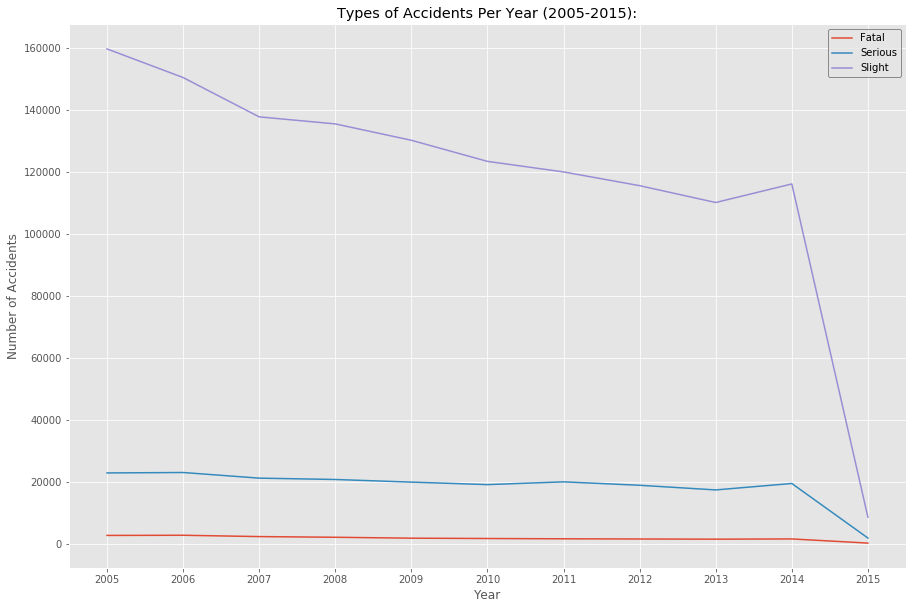

In [221]:
plt.figure(figsize=(15,10))
plt.plot(accidents_per_yr['Year'], yearly_fatal_counts["Accident_Index"], label = 'Year')
plt.plot(accidents_per_yr['Year'], yearly_serious_counts["Accident_Index"], label = 'Year')
plt.plot(accidents_per_yr['Year'], yearly_slight_counts["Accident_Index"], label = 'Year')
plt.title('Types of Accidents Per Year (2005-2015):')
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.style.use("ggplot")
plt.show
plt.savefig('Types_of_Accidents_per_year.png')
lgnd = plt.legend(("Fatal","Serious","Slight"), frameon = True, edgecolor = 'black')

In [84]:
## accident_severity_merged = pd.merge(organized_accidents, context_accident_severity, how="left", left_on="Accident_Severity", right_on="code")
grouped_accident_serverity = accident_severity_merged.groupby("label")
severity_counts = pd.DataFrame(grouped_accident_serverity["Accident_Index"].count())
renamed_severity_counts = severity_counts.rename(columns={"Accident_Index":"Number of Accidents"})
renamed_severity_counts

,Number of Accidents
label,
Fatal,20569
Serious,220753
Slight,1409820


In [87]:
#casualties_per_yr = clean_accident_df.loc[:,'label'].groupby(clean_accident_df['Date'].map(lambda x: x[6:10])).count()
#casualties_per_yr = casualties_per_yr.to_frame()
#casualties_per_yr['Year'] = casualties_per_yr.index
#casualties_per_yr.columns = ['Accidents','Year']
#casualties_per_yr.head()

* Above, we are extracting the year from the "year" column and counting casualties per year due to car accidents. 

In [88]:
#plt.figure(figsize=(15,10))
#plt.plot(casualties_per_yr['Year'], casualties_per_yr["Accidents"], label = 'Year')
#plt.title('Number of Casualties Due to Car Accidents Per Year (2005-2015):')
#plt.xlabel("Year")
#plt.ylabel("Number of Casualties")
#plt.style.use("ggplot")
#plt.show

* The graph above displays number of caualties per year due to car accidents. 

In [89]:
context_veh_names = pd.read_csv("contextCSVs/Vehicle_Type.csv")

* Here, we are importing a context csv to make sense of each vehicle type. 

In [90]:
context_veh_names

,code,label
0,1,Pedal cycle
1,2,Motorcycle 50cc and under
2,3,Motorcycle 125cc and under
3,4,Motorcycle over 125cc and up to 500cc
4,5,Motorcycle over 500cc
5,8,Taxi/Private hire car
6,9,Car
7,10,Minibus (8 - 16 passenger seats)
8,11,Bus or coach (17 or more pass seats)
9,16,Ridden horse


In [91]:
vehicle_type_merged = pd.merge(organized_vehicles, context_veh_names, how="left", left_on="Vehicle_Type", right_on="code")

* Above, we have merged the context csv to our vehicle data. 

In [92]:
vehicle_type_merged.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Vehicle_Manoeuvre,Junction_Location,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),code,label
0,200501BS00001,1,9,18,0,15,2,74,-1,9,Car
1,200501BS00002,1,11,4,3,1,1,42,8268,11,Bus or coach (17 or more pass seats)
2,200501BS00003,1,11,17,0,1,1,35,8300,11,Bus or coach (17 or more pass seats)
3,200501BS00003,2,9,2,0,15,1,62,1762,9,Car
4,200501BS00004,1,9,18,0,15,2,49,1769,9,Car


In [93]:
grouped_vehicle_data = vehicle_type_merged.groupby("label")
vehicle_counts = pd.DataFrame(grouped_vehicle_data["Accident_Index"].count())
renamed_vehicle_counts = vehicle_counts.rename(columns={"Accident_Index":"Number of Accidents"})
renamed_vehicle_counts

,Number of Accidents
label,
Agricultural vehicle,6304
Bus or coach (17 or more pass seats),76888
Car,2205201
Data missing or out of range,473
Electric motorcycle,19
Goods 7.5 tonnes mgw and over,62962
Goods over 3.5t. and under 7.5t,22567
Goods vehicle - unknown weight,387
Minibus (8 - 16 passenger seats),8387


In [143]:
bins = [0, 1, 2, 3, 4, 5, 6]
renamed_vehicle_counts["Vehicle ID"] = [1,2,3,7,4,6,6,6,2,1,4,4,4,4,4,1,4,1,3,2,5]
renamed_vehicle_counts
group_labels_cars = ["Other", "Bus", "Car","Motorcycle/Bike", "Van", "Semi-Truck"]
renamed_vehicle_counts["group"] = pd.cut(renamed_vehicle_counts["Vehicle ID"], bins, labels=group_labels)
renamed_vehicle_counts.head(25)

,Number of Accidents,Vehicle ID,group
label,,,
Agricultural vehicle,6304,1,Passing
Bus or coach (17 or more pass seats),76888,2,Turning Right
Car,2205201,3,Slowing or Stoping
Data missing or out of range,473,7,NaN
Electric motorcycle,19,4,Moving Off Roadway
Goods 7.5 tonnes mgw and over,62962,6,Turning Left
Goods over 3.5t. and under 7.5t,22567,6,Turning Left
Goods vehicle - unknown weight,387,6,Turning Left
Minibus (8 - 16 passenger seats),8387,2,Turning Right


In [95]:
vehicle_groups = renamed_vehicle_counts.groupby(["group"])
vehicle_group = pd.DataFrame(vehicle_groups["Number of Accidents"].sum()) 
vehicle_group

,Number of Accidents
group,
Other,32365
Bus,85525
Car,2257610
Motorcycle/Bike,404354
Van,138182
Semi-Truck,85916


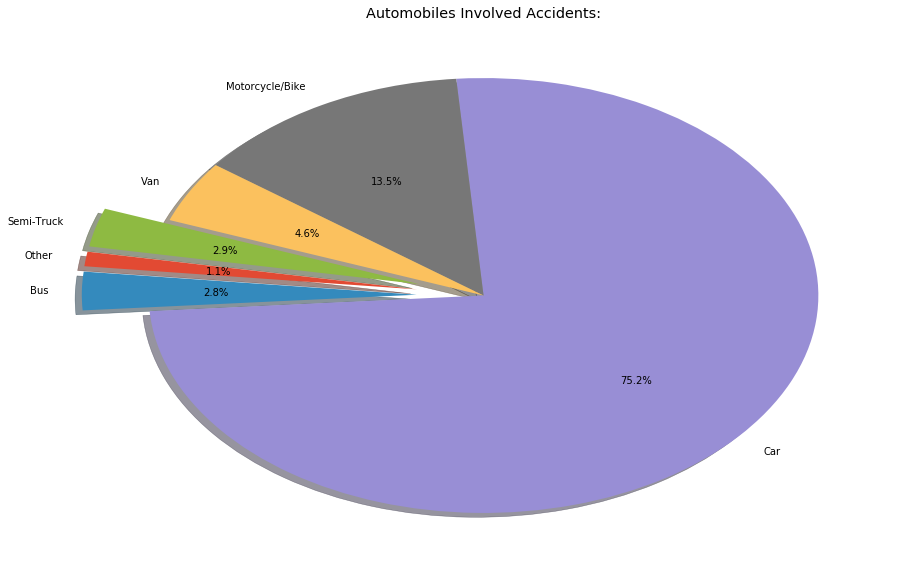

In [144]:
explode = (0.2, 0.2, 0, 0, 0, 0.2)
plt.figure(figsize=(15,10))
plt.pie(vehicle_group["Number of Accidents"], labels = group_labels_cars, autopct="%1.1f%%", explode=explode, shadow=True, startangle=170)
plt.title("Automobiles Involved Accidents:")
plt.style.use("ggplot")
plt.show
plt.savefig('Vehicles_pie_chart.png')

<Figure size 432x288 with 0 Axes>

In [98]:
context_loc = pd.read_csv("contextCSVs/Local_Authority_Highway.csv")

In [99]:
context_loc.head()

,Code,Label
0,S12000033,Aberdeen City
1,S12000034,Aberdeenshire
2,S12000041,Angus
3,S12000035,Argyll & Bute
4,E09000002,Barking and Dagenham


In [100]:
location_accident = pd.merge(organized_accidents, context_loc, how="left", left_on="Local_Authority_(Highway)", right_on="Code")

In [101]:
location_accident.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Local_Authority_(Highway),Code,Label
0,200501BS00001,-0.191170,51.489096,2,1,1,04/01/2005,1,2,2,0,E09000020,E09000020,Kensington and Chelsea
1,200501BS00002,-0.211708,51.520075,3,1,1,05/01/2005,4,1,1,0,E09000020,E09000020,Kensington and Chelsea
2,200501BS00003,-0.206458,51.525301,3,2,1,06/01/2005,4,1,1,0,E09000020,E09000020,Kensington and Chelsea
3,200501BS00004,-0.173862,51.482442,3,1,1,07/01/2005,1,1,1,0,E09000020,E09000020,Kensington and Chelsea
4,200501BS00005,-0.156618,51.495752,3,1,1,10/01/2005,7,1,2,0,E09000020,E09000020,Kensington and Chelsea


In [102]:
loc_accident_data = location_accident.groupby("Label")

accident_loc_counts = pd.DataFrame(loc_accident_data["Accident_Index"].count())

re_accident_loc_counts = accident_loc_counts.rename(columns={"Accident_Index":"Number of Accidents"})

re_accident_loc_counts.head()

,Number of Accidents
Label,
Barking and Dagenham,5162
Barnet,11740
Barnsley,6535
Bath and North East Somerset,4299
Bedford,4603


In [103]:
top_ten_locations = re_accident_loc_counts.sort_values("Number of Accidents", ascending=False).head(10)

In [104]:
top_ten_locations["Lat"] = [ 51.272644, 51.283836, 53.789522, 51.7343, 51.0577, 52.478907, 51.764946, 52.832489, 53.204128, 53.120772]
top_ten_locations["Lng"] = [0.525270, -0.441998, -2.722108, 0.503725, -1.296247, -1.888937, -0.394875, -2.129735, -0.519356, -1.062039]

In [105]:
top_ten_locations.head(10)

,Number of Accidents,Lat,Lng
Label,,,
Kent,49188,51.272644,0.525270
Surrey,45291,51.283836,-0.441998
Lancashire,39435,53.789522,-2.722108
Essex,38525,51.734300,0.503725
Hampshire,35919,51.057700,-1.296247
Birmingham,34087,52.478907,-1.888937
Hertfordshire,32505,51.764946,-0.394875
Staffordshire,27794,52.832489,-2.129735
Lincolnshire,25695,53.204128,-0.519356


In [106]:
group_labels_city = top_ten_locations.index

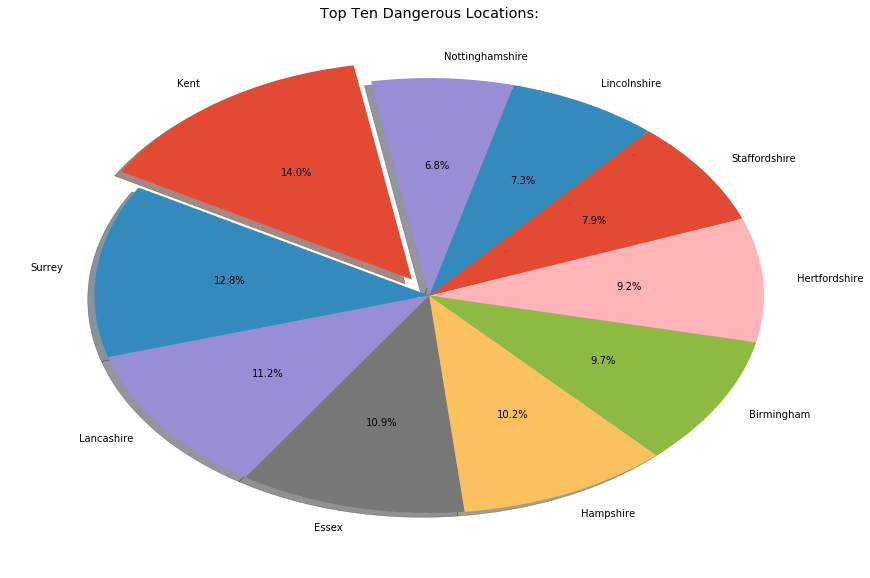

In [139]:
plt.figure(figsize=(15,10))
explode = (.09,0,0,0,0,0,0,0,0,0) 
plt.pie(top_ten_locations["Number of Accidents"], labels = group_labels_city, explode=explode, autopct="%1.1f%%", startangle=100, shadow = True)
plt.title("Top Ten Dangerous Locations:")
plt.style.use("ggplot")

plt.show
plt.savefig('Dangerous_locations_pie.png')

<Figure size 432x288 with 0 Axes>

In [109]:
gmaps.configure(api_key=gkey)

In [110]:
locations = top_ten_locations[["Lat", "Lng"]].astype(float)
num_accidents = top_ten_locations["Number of Accidents"].astype(float)

In [225]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=num_accidents, 
                                 dissipating=False, max_intensity=50000,
                                 point_radius = 10)

heat_layer.dissipating = False
heat_layer.max_intensity = 50000
heat_layer.point_radius = .5

fig.add_layer(heat_layer)
fig.figsize=(15,10)

fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [112]:
complete_accident_data.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,...,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Casualty_Type
0,200501BS00001,-0.191170,51.489096,2,1,1,04/01/2005,1,2,2,...,2,74,-1,1,1,3,1,37,2,0
1,200501BS00002,-0.211708,51.520075,3,1,1,05/01/2005,4,1,1,...,1,42,8268,1,1,2,1,37,3,11
2,200501BS00003,-0.206458,51.525301,3,2,1,06/01/2005,4,1,1,...,1,35,8300,2,1,1,1,62,3,9
3,200501BS00003,-0.206458,51.525301,3,2,1,06/01/2005,4,1,1,...,1,62,1762,2,1,1,1,62,3,9
4,200501BS00004,-0.173862,51.482442,3,1,1,07/01/2005,1,1,1,...,2,49,1769,1,1,3,1,30,3,0


In [113]:
light_cond = pd.read_csv("contextCSVs/Light_Conditions.csv")

In [114]:
light_cond.head()

,code,label
0,1,Daylight
1,4,Darkness - lights lit
2,5,Darkness - lights unlit
3,6,Darkness - no lighting
4,7,Darkness - lighting unknown


In [115]:
light_cond_accident = pd.merge(organized_accidents, light_cond, how="left", left_on="Light_Conditions", right_on="code")

In [116]:
light_cond_accident.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Local_Authority_(Highway),code,label
0,200501BS00001,-0.191170,51.489096,2,1,1,04/01/2005,1,2,2,0,E09000020,1,Daylight
1,200501BS00002,-0.211708,51.520075,3,1,1,05/01/2005,4,1,1,0,E09000020,4,Darkness - lights lit
2,200501BS00003,-0.206458,51.525301,3,2,1,06/01/2005,4,1,1,0,E09000020,4,Darkness - lights lit
3,200501BS00004,-0.173862,51.482442,3,1,1,07/01/2005,1,1,1,0,E09000020,1,Daylight
4,200501BS00005,-0.156618,51.495752,3,1,1,10/01/2005,7,1,2,0,E09000020,7,Darkness - lighting unknown


In [117]:
light_cond_acc = light_cond_accident.groupby("label")

light_cond_accident_counts = pd.DataFrame(light_cond_acc["Accident_Index"].count())

re_light_cond_accident_counts = light_cond_accident_counts.rename(columns={"Accident_Index":"Number of Accidents"})

re_light_cond_accident_counts.head()

,Number of Accidents
label,
Darkness - lighting unknown,18654
Darkness - lights lit,326763
Darkness - lights unlit,7249
Darkness - no lighting,88118
Daylight,1210358


In [118]:
xaxis = [1,2,3,4,5]

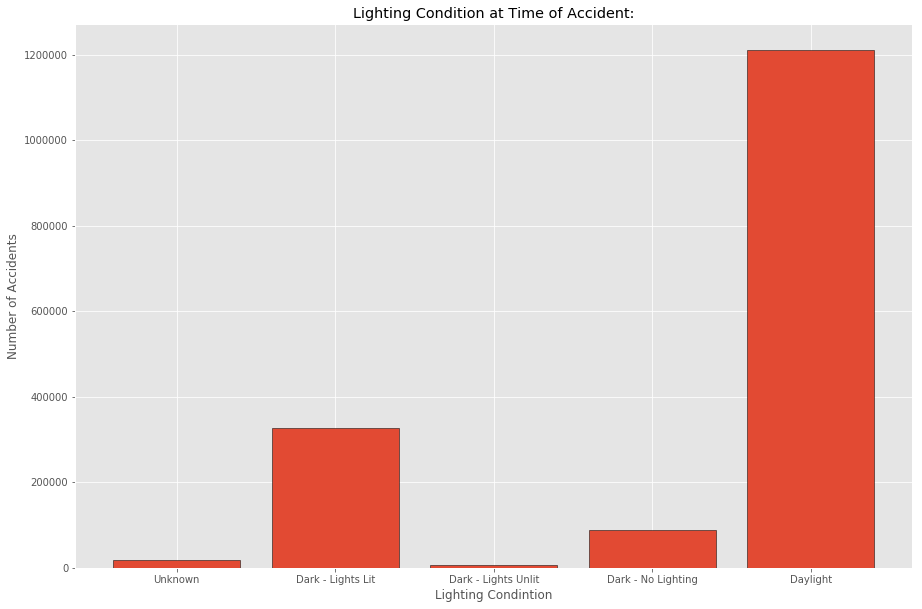

In [137]:
plt.figure(figsize=(15,10))
plt.bar(xaxis, re_light_cond_accident_counts["Number of Accidents"], edgecolor = 'black')
tick_locations = [value for value in xaxis]
plt.xticks(tick_locations, ["Unknown", "Dark - Lights Lit", "Dark - Lights Unlit", "Dark - No Lighting", "Daylight"])
plt.title("Lighting Condition at Time of Accident:")
plt.xlabel("Lighting Condintion")
plt.ylabel("Number of Accidents")
plt.savefig('lighting_conditions_bar.png')

In [121]:
vehicle_man = pd.read_csv("contextCSVs/Vehicle_Manoeuvre.csv")

In [122]:
vehicle_man.head()

,code,label
0,1,Reversing
1,2,Parked
2,3,Waiting to go - held up
3,4,Slowing or stopping
4,5,Moving off


In [123]:
merged_vehicle_man = pd.merge(organized_vehicles, vehicle_man, how="left", left_on="Vehicle_Manoeuvre", right_on="code")

In [124]:
merged_vehicle_man.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Vehicle_Manoeuvre,Junction_Location,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),code,label
0,200501BS00001,1,9,18,0,15,2,74,-1,18,Going ahead other
1,200501BS00002,1,11,4,3,1,1,42,8268,4,Slowing or stopping
2,200501BS00003,1,11,17,0,1,1,35,8300,17,Going ahead right-hand bend
3,200501BS00003,2,9,2,0,15,1,62,1762,2,Parked
4,200501BS00004,1,9,18,0,15,2,49,1769,18,Going ahead other


In [125]:
vehicle_man_acc = merged_vehicle_man.groupby("label")

vehicle_man_accident_counts = pd.DataFrame(vehicle_man_acc["Accident_Index"].count())

re_vehicle_man_accident_counts = vehicle_man_accident_counts.rename(columns={"Accident_Index":"Number of Accidents"})

re_vehicle_man_accident_counts.head(20)

,Number of Accidents
label,
Changing lane to left,25438
Changing lane to right,30754
Data missing or out of range,1080
Going ahead left-hand bend,113616
Going ahead other,1416157
Going ahead right-hand bend,127225
Moving off,113009
Overtaking - nearside,18083
Overtaking moving vehicle - offside,61045


In [126]:
top_ten_dangerous_vehicle_man = re_vehicle_man_accident_counts.sort_values("Number of Accidents", ascending=False).head(10)

In [127]:
top_ten_dangerous_vehicle_man.head(10)

,Number of Accidents
label,
Going ahead other,1416157
Turning right,289009
Slowing or stopping,227644
Waiting to go - held up,203680
Going ahead right-hand bend,127225
Going ahead left-hand bend,113616
Moving off,113009
Parked,112958
Turning left,96119


In [128]:
bins = [0, 1, 2, 3, 4, 5, 6]
top_ten_dangerous_vehicle_man["Man ID"] = [1,2,3,3,1,1,4,5,6,1]
group_labels = ["Passing", "Turning Right", "Slowing or Stoping","Moving Off Roadway", "Parked", "Turning Left"]
top_ten_dangerous_vehicle_man["group"] = pd.cut(top_ten_dangerous_vehicle_man["Man ID"], bins, labels=group_labels)
top_ten_dangerous_vehicle_man.head(10)

,Number of Accidents,Man ID,group
label,,,
Going ahead other,1416157,1,Passing
Turning right,289009,2,Turning Right
Slowing or stopping,227644,3,Slowing or Stoping
Waiting to go - held up,203680,3,Slowing or Stoping
Going ahead right-hand bend,127225,1,Passing
Going ahead left-hand bend,113616,1,Passing
Moving off,113009,4,Moving Off Roadway
Parked,112958,5,Parked
Turning left,96119,6,Turning Left


In [129]:
man_groups = top_ten_dangerous_vehicle_man.groupby(["group"])
man_grouped = pd.DataFrame(man_groups["Number of Accidents"].sum()) 
man_grouped

,Number of Accidents
group,
Passing,1718043
Turning Right,289009
Slowing or Stoping,431324
Moving Off Roadway,113009
Parked,112958
Turning Left,96119


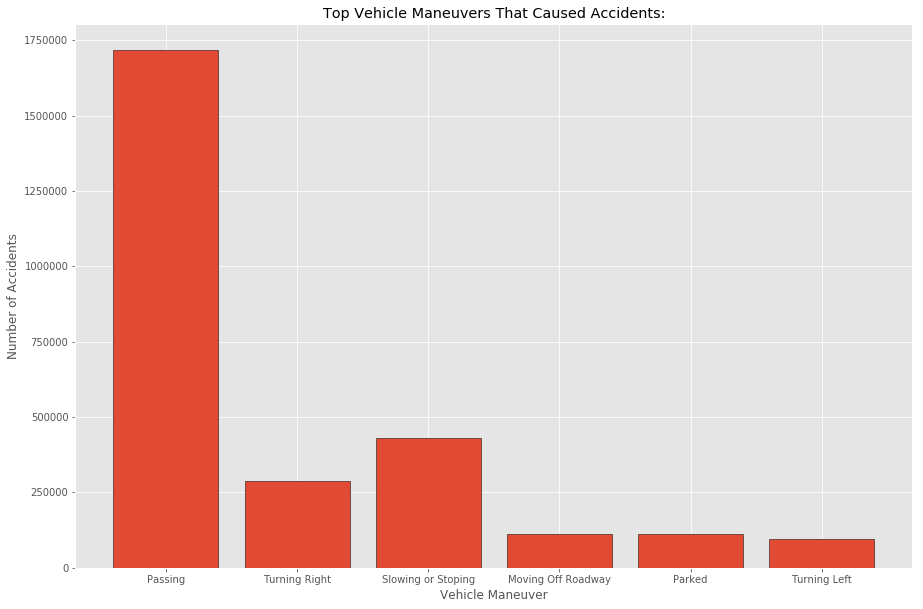

In [136]:
plt.figure(figsize=(15,10))
plt.bar(group_labels, man_grouped["Number of Accidents"], edgecolor = 'black', tick_label=group_labels)
plt.title("Top Vehicle Maneuvers That Caused Accidents:")
plt.xlabel("Vehicle Maneuver")
plt.ylabel("Number of Accidents")
plt.savefig('Dangerous_maneuvers.png')

<Figure size 432x288 with 0 Axes>

In [131]:
num_acc_df = clean_accident_df[['Accident_Index', 'Road_Type']]
Road_Type_count = num_acc_df.groupby('Road_Type')
count_Road_Type = Road_Type_count.count()
count_Road_Type.head()

,Accident_Index
Road_Type,
1,113018
2,33830
3,243231
6,1234766
7,17250


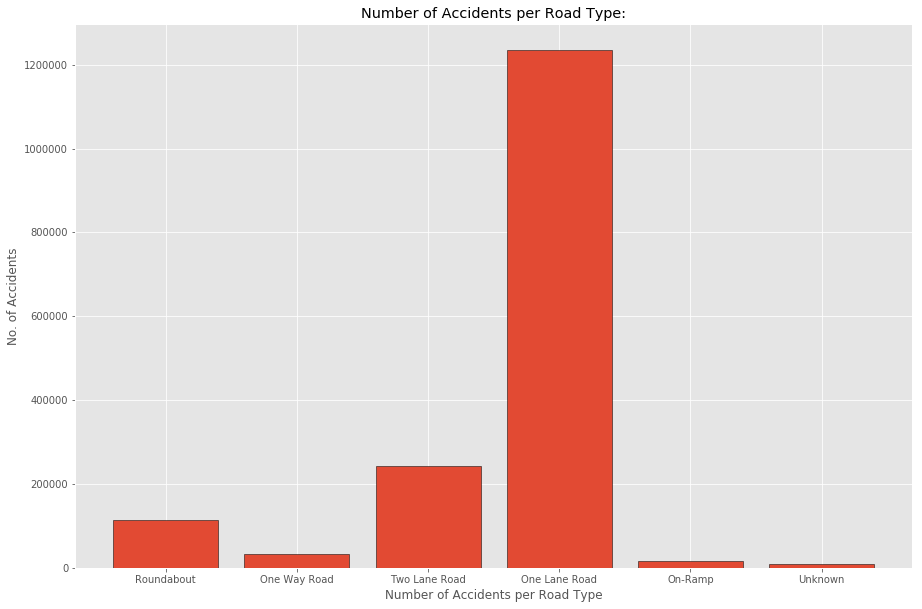

In [135]:
tick_marks = ['Roundabout','One Way Road','Two Lane Road','One Lane Road','On-Ramp','Unknown']
plt.figure(figsize=(15,10))
plt.bar(tick_marks, count_Road_Type["Accident_Index"], edgecolor="black", tick_label=tick_marks)
plt.title("Number of Accidents per Road Type:")
plt.xlabel("Number of Accidents per Road Type")
plt.ylabel("No. of Accidents")
plt.savefig('Road_type.png')

<function matplotlib.pyplot.show(*args, **kw)>

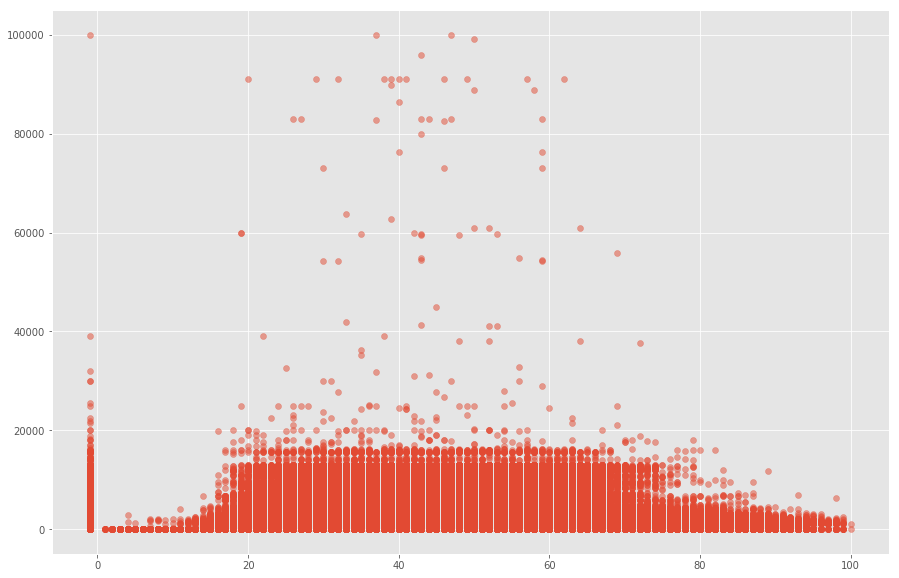

In [228]:
plt.figure(figsize=(15,10))
plt.scatter(organized_vehicles["Age_of_Driver"],organized_vehicles["Engine_Capacity_(CC)"], alpha = 0.5)
plt.style.use('ggplot')
plt.show

In [233]:
casualty_data.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


<function matplotlib.pyplot.show(*args, **kw)>

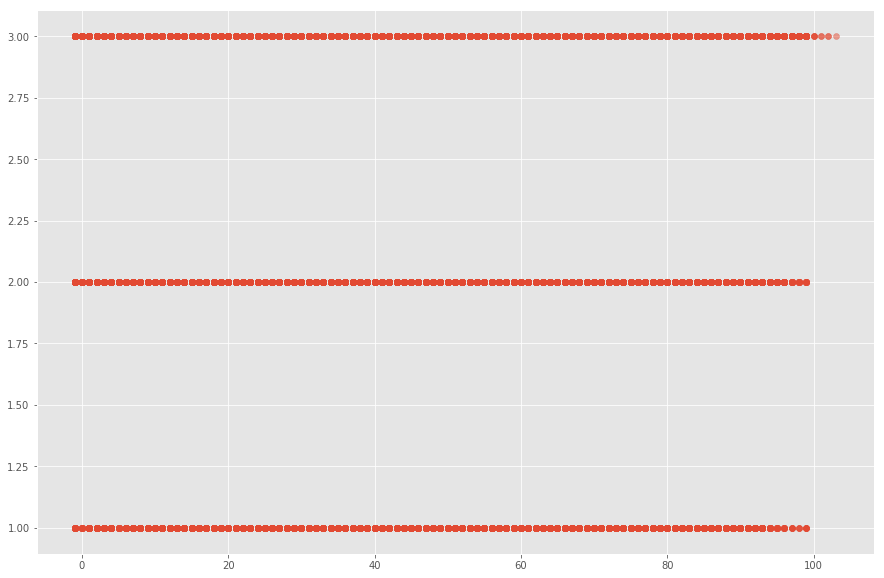

In [234]:
plt.figure(figsize=(15,10))
plt.scatter(casualty_data["Age_of_Casualty"],casualty_data["Casualty_Severity"], alpha = 0.5)
plt.style.use('ggplot')
plt.show